<font size=5>**Чалова Ирина ИМБО-01-19**

# **Прикладные задачи нелинейной динамики**
## **Лабораторная работа №7. Моделирование одномерных точечных отображений**
### **Моделирование одномерных точечных отображений на примере логистического отображения. Сверхчувствительность к изменению начальных условий**

Решив для уравнения

$$
\cfrac{dx}{dt}=r · x ·(1-x)
$$

задачу Коши с начальным условием $x(t_0) = x_0$, получим 
классическую логистическую зависимость (кривую Ферхюльста или Пирла-Рида):

$$
x(t)=\frac{1}{1+(\frac{1}{x_0}-1)· e^{-r · (t-t_0)}}
$$

Здесь $r$ – параметр уравнения, имеющий содержательный смысл относительного прироста показателя $x(t)$ при его малых значениях.

In [2]:
import scipy.integrate as integr            
import numpy as np                          
import matplotlib.pyplot as plt
from scipy.signal import argrelextrema
import pylab

colors = ["#00FFFF",                # Azure
          "#0000FF",                # Blue
          "#FF0000",                # Red
          "#00FF00",                # Green
          "#D2691E",                #
          "#AAA662",
          "#9A0EEA",
          "#808000",
          "#FFA500",
          "#9ACD32",
          "#ED0DD9",
          "#FC5A50",
          "#929591",
          "#029386",
          "#C79FEF",
          "#FAC205",
          "#6E750E",
          "#06C2AC",
          "#CD5C5C",                # IndianRed
          "#A52A2A",                # Brown
          "#7B68EE",                # MediumState_blue
          "#4682B4",                # SteelBlue
          "#800000"                # Maroon
          ]
colors = 10*colors

stat_dpi = 90
rect_pics = (5, 5)
dynamics_pics = (9, 5)

Варианты значений параметра $r$ и начальной точки $x_0$:

$
r_1 = 1,9 \\
r_2 = 2,3 \\
x_0 = 0,1
$

In [3]:
def logistic(t, r, x_0, t_0):
    result = 1/(1 + (1/x_0 - 1) * np.exp(-r*(t-t_0)))
    return result

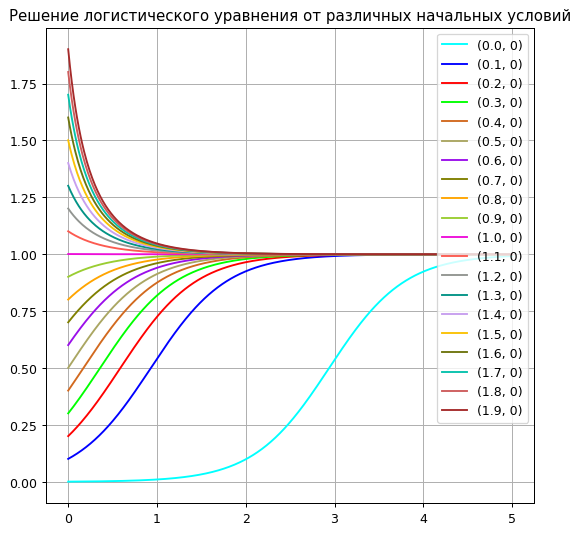

In [4]:
time = np.linspace(0, 5, 500)
fig = plt.figure(facecolor="white", figsize = (7,7), dpi=stat_dpi)
step = 0.1
for i in np.arange(0.001, 2, step):
    plt.plot(time, logistic(time, 2.35, i, 0), c = colors[int(i/step)%30], label = f'({round(i, 2)}, 0)')
plt.title("Решение логистического уравнения от различных начальных условий")
plt.legend(loc="upper right")
plt.grid(True)
plt.show()

При любых начальных значениях $x_0$ динамика $x(t)$ имеет монотонный характер.

Точки $x_1 ^ * =0$ и $x_2 ^ * =1$ являются точками покоя: производная первого порядка в этих точках обращается в нуль.

Первая точка покоя неустойчивая – все траектории независимо от начальных условий удаляются от начала координат.

Вторая точка покоя асимптотически устойчива – все интегральные кривые с ростом $t$ асимптотически приближаются к положению равновесия, совпадающему с единичным уровнем.

Дискретным аналогом рассматриваемого уравнения является логистическое отображение. Аппроксимация производной разностным соотношением 
дает нелинейное точечное отображение, также называемое логистическим:

$$
x_{n+1}=(1+r) · x_n - r · x_n ^ 2
$$

In [5]:
def discr_sol(x_0, r, times=0):
    X = [x_0]
    for i in range(times-1):
        X.append((1 + r)*X[-1] - r*X[-1]**2)
    return X

Поведение решений дифференциального логистического уравнения (синий) и его разностного аналога (оранжевый) при $r=1,9, x_0=0,1$.

Обе кривые рассчитаны для значения $r=1,9$ и выходят из одной и той же начальной точки $x_0=0,1$.

В непрерывном случае характер решения $x(t)$ – монотонный независимо от начальных условий, тогда как порождаемая разностным уравнением последовательность $x_0,x_1,x_2,…$ напротив – не монотонная, при $r=1,9$ она представляет колебательный процесс относительно равновесного уровня. 

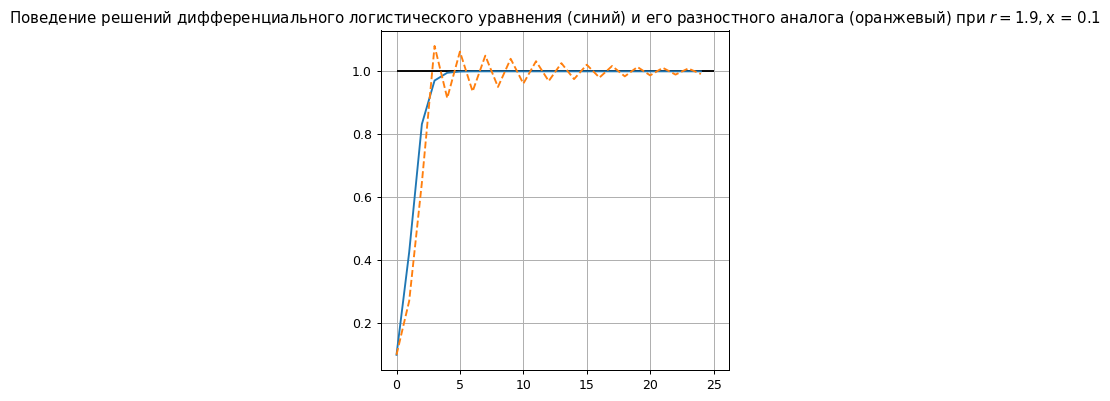

In [6]:
r1 = 1.9
x0 = 0.1

time = np.arange(0, 25)
fig = plt.figure(facecolor="white", figsize = rect_pics, dpi=stat_dpi)

plt.hlines(1, 0, len(time), color='black')
plt.plot(logistic(time, r1, x0, 0))
plt.plot(discr_sol(x0, r1, len(time)), linestyle='dashed')
plt.title(r"Поведение решений дифференциального логистического уравнения (синий) и его разностного аналога (оранжевый) при $r ="+str(r1)+ ", $x = "+str(x0))
plt.grid(True)
plt.show()

Поведение решений дифференциального логистического уравнения (синий) и его разностного аналога (оранжевый) при $r=2,3, x_0=0,1$.

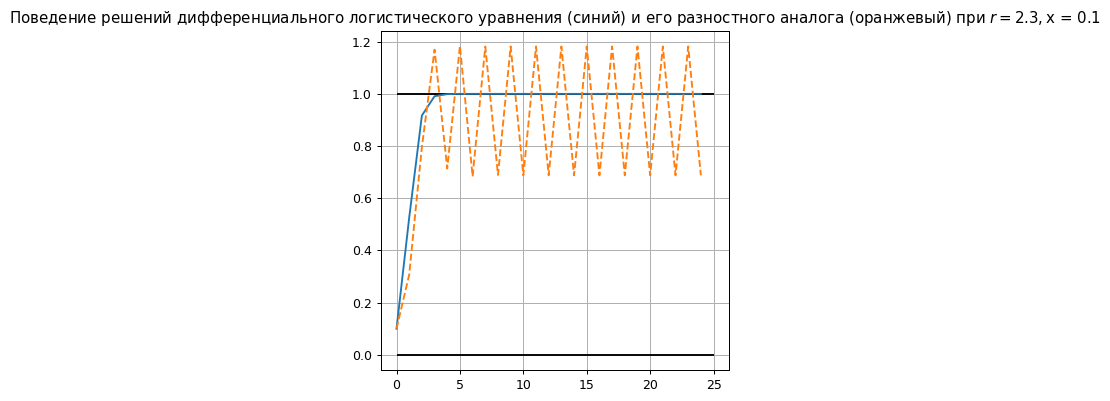

In [7]:
r2 = 2.3
time = np.arange(0, 25)
fig = plt.figure(facecolor="white", figsize = rect_pics, dpi=stat_dpi)

plt.hlines(1, 0, len(time), color='black')
plt.hlines(0, 0, len(time), color='black')
plt.plot(logistic(time, r2, x0, 0))
plt.plot(discr_sol(x0, r2, len(time)), linestyle='dashed')
plt.title(r"Поведение решений дифференциального логистического уравнения (синий) и его разностного аналога (оранжевый) при $r ="+str(r2)+ ", $x = "+str(x0))
plt.grid(True)
plt.grid(True)
plt.show()

Из графиков видно, что порождаемая разностным уравнением последовательность точек не монотонная, а представляет собой колебательный процесс.

В случае, когда точка покоя $x^*$ является устойчивой, решение сначала колеблется относительно положения равновесия, а затем сходится в этом положении.

В другом случае, когда $x^*$ является неустойчивой точкой, появляется двукратный цикл, который представляет собой колебательный процесс относительно равновесного уровня.

Что касается начального условия $x_0$, то единичный уровень оказывается критическим: переход через него приводит к качественному изменению характера решения. Если $x_0 <1$, все решения дифференциального уравнения монотонно возрастают, тогда как при $x_0 >1 \ -$ монотонно убывают.

### Двукратный цикл

In [8]:
def doubleApproximation(r, x_0, times=50):
  time = np.arange(0, times)
  fig = plt.figure(facecolor="white", figsize = dynamics_pics, dpi=stat_dpi)
  ff = lambda x : (1 + r) * ((1 + r)*x - r*x**2) - r * ((1+r)*x-r*x**2)**2

  plt.hlines(1, 0, len(time), color='black')
  plt.hlines(0, 0, len(time), color='black')

  xp3 = (2*r + r**2 - r*(-4 + r**2)**0.5)/(2*r**2)
  xp4 = (2*r + r**2 + r*(-4 + r**2)**0.5)/(2*r**2)

  plt.hlines(xp3, 0, len(time), color='black')
  plt.hlines(xp4, 0, len(time), color='black')
    
  data = discr_sol(x_0, r, len(time))

  plt.scatter(x=time, y=data)
  plt.plot(time, data, linestyle='dashed')
  plt.plot(np.linspace(0, 50, 1000), logistic(np.linspace(0, 50, 1000), r, x_0, 0))
  plt.title(r"Диграмма последования для режима двукратного цикла при r = "+str(r))
  plt.grid(True)
  plt.show()

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


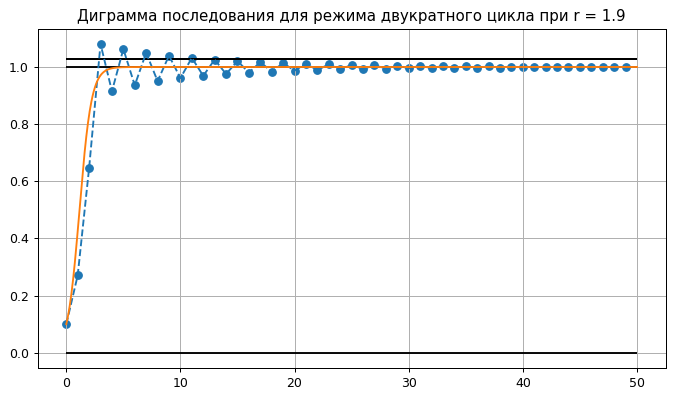

In [9]:
doubleApproximation(r=r1, x_0=0.1)

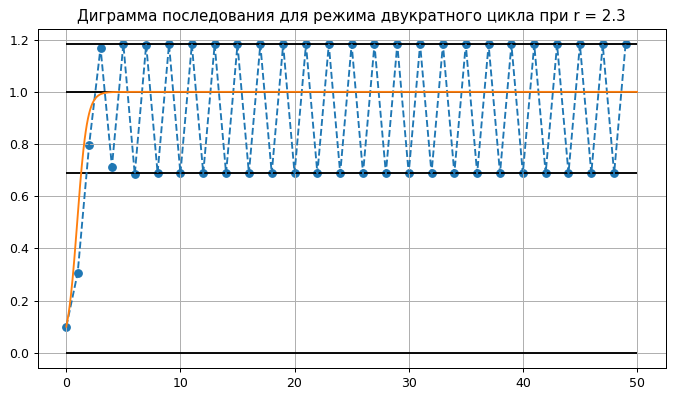

In [10]:
doubleApproximation(r=r2, x_0=0.1)

### Диаграмма Кёнигса-Ламерея

Точки прямой $t=n·τ,$ совпадающие после преобразования с точками прямой 
$t=(n+1)·τ,$ называются неподвижными (инвариантными) точками точечного 
преобразования. Неподвижные точки соответствуют периодическому 
движению фазовой траектории динамической системы с периодом $τ$.

На диаграмме Кёнигса-Ламерея на оси абсцисс расположены точки-оригиналы, а на оси ординат – точки-образы. 

Неподвижные точки на диаграмме находятся как точки пересечения функции 
последования $f(x)$ с биссектрисой координатного угла. 

In [91]:
def KenLam(times, x_0, r, with_2cr = False, with_3cr=False, with_4cr=False, constant_size=False, arrow_c=["green"]):
  f = lambda x : (1 + r)*x - r*x**2
  fig = plt.figure(facecolor="white", figsize = dynamics_pics, dpi=stat_dpi)
  dtime = np.arange(x_0, times)
  X = [x_0]
  Y = [x_0]
  plt.scatter(X, Y)

  for i in dtime:
    y = f(X[-1])
    X.append(X[-1])
    Y.append(y)
    X.append(y)
    Y.append(Y[-1])

  scale = (max(X)-min(X))
  for i in range(1, len(X)):
    plt.arrow(X[i-1], Y[i-1], X[i]-X[i-1],
    Y[i]-Y[i-1], head_width=0.01*scale, head_length=0.02*scale,
    color=arrow_c[i%(len(arrow_c))], width=0.0005*scale, alpha=0.3, length_includes_head=True)

  time = np.linspace(min(X), max(X))
  plt.plot(time, time)
  if constant_size:
    time = np.linspace(0, (1+r)/r)
    plt.plot(time, f(time))
    plt.title(r"Диаграмма Кёнигса-Ламерея для отображения $f(x) = (1+r)x - rx^2$ при $r ="+str(r)+", $x_0 = "+str(x_0))
  if with_2cr:
    plt.plot(time, f(f(time)))
    plt.title(r"Диаграмма Кёнигса-Ламерея для двукратного отображения при $r ="+str(r)+", $x_0 = "+str(x_0))
  if with_3cr:
    plt.plot(time, f(f(f(time))), color='darkgreen')
    plt.title(r"Диаграмма Кёнигса-Ламерея для трехкратного отображения при $r ="+str(r)+", $x_0 = "+str(x_0))
  if with_4cr:
    plt.plot(time, f(f(f(f(time)))), color='olive')
    plt.title(r"Диаграмма Кёнигса-Ламерея для четырехкратного отображения при $r ="+str(r)+", $x_0 = "+str(x_0))

  plt.scatter([X[i] for i in range(len(X)) if i%2==0][:-1], [X[i] for i in range(len(X)) if i%2==0][1:], color="red")
  
  plt.grid(True)
  plt.show()

In [81]:
def analyze(configs):
    for i in configs:
        KenLam(i['times'], i['x_0'], i['r'], constant_size=i['constant_size'], 
               with_2cr=i['with_2cr'], with_3cr=i['with_3cr'], with_4cr=i['with_4cr'], arrow_c=i['arrow_colors'])

При $r=2.3$

У получившихся точечных преобразований последовательность итераций сходится к паре точек ($a$ и $b$ таких, что $f(a)=b, f(b)=a$). На диаграмме Кёнигса-Ламерея им соответствуют замкнутые контуры (черные прямоугольники). Эти точки являются $n$-кратными неподвижными точками по $n$-ой итерации функции $f(x)$.

Оранжевым цветом отрисована функция последования $f(x)$. Зелеными цветами - она же при $n$-ой итерации. Синим - биссектриса.

In [95]:
configs1=[
    {
        'times': 100,
        'x_0': 0.1,
        'r': 2.3,
        'with_2cr': False,
        'with_3cr': False,
        'with_4cr': False,
        'arrow_colors': ['black'],
        'constant_size': True
    },
    {
        'times': 100,
        'x_0': 0.1,
        'r': 2.3,
        'with_2cr': True,
        'with_3cr': False,
        'with_4cr': False,
        'arrow_colors': ['black'],
        'constant_size': True
    },
    {
        'times': 100,
        'x_0': 0.1,
        'r': 2.3,
        'with_2cr': False,
        'with_3cr': True,
        'with_4cr': False,
        'arrow_colors': ['black'],
        'constant_size': True
    },
    {
        'times': 100,
        'x_0': 0.1,
        'r': 2.3,
        'with_2cr': False,
        'with_3cr': False,
        'with_4cr': True,
        'arrow_colors': ['black'],
        'constant_size': True
    }
]

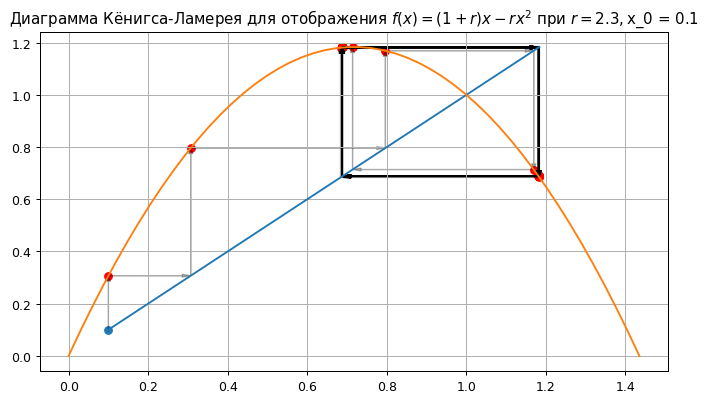

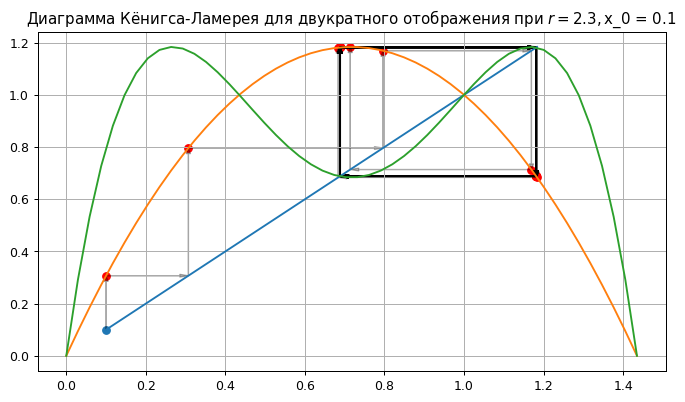

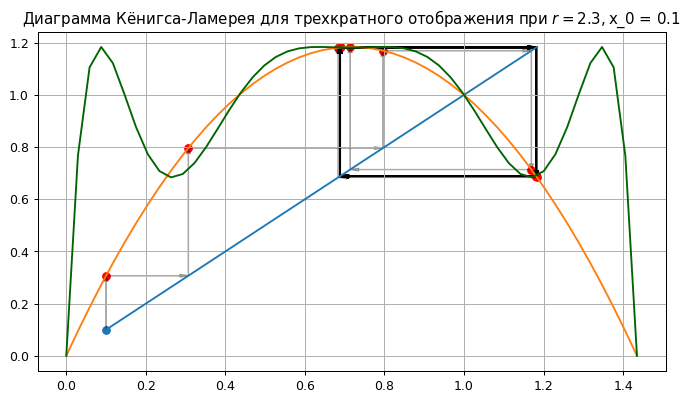

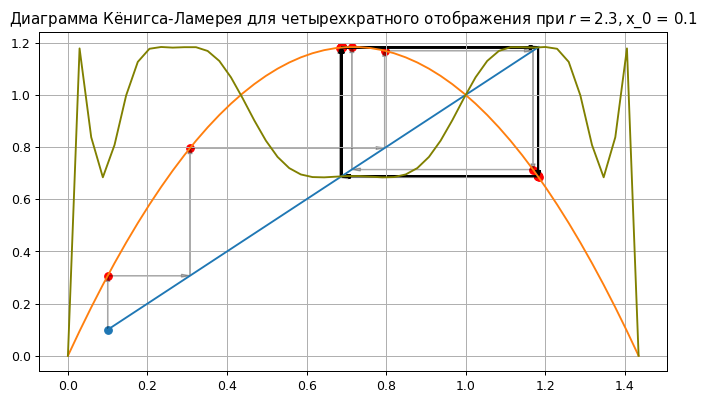

In [96]:
analyze(configs1)

При $r=3$

In [103]:
configs2=[
    {
        'times': 100,
        'x_0': 0.1,
        'r': 3,
        'with_2cr': False,
        'with_3cr': False,
        'with_4cr': False,
        'arrow_colors': ['black'],
        'constant_size': True
    },
    {
        'times': 100,
        'x_0': 0.1,
        'r': 3,
        'with_2cr': True,
        'with_3cr': False,
        'with_4cr': False,
        'arrow_colors': ['black'],
        'constant_size': True
    },
    {
        'times': 100,
        'x_0': 0.1,
        'r': 3,
        'with_2cr': False,
        'with_3cr': True,
        'with_4cr': False,
        'arrow_colors': ['black'],
        'constant_size': True
    },
    {
        'times': 100,
        'x_0': 0.1,
        'r': 3,
        'with_2cr': False,
        'with_3cr': False,
        'with_4cr': True,
        'arrow_colors': ['black'],
        'constant_size': True
    }
]

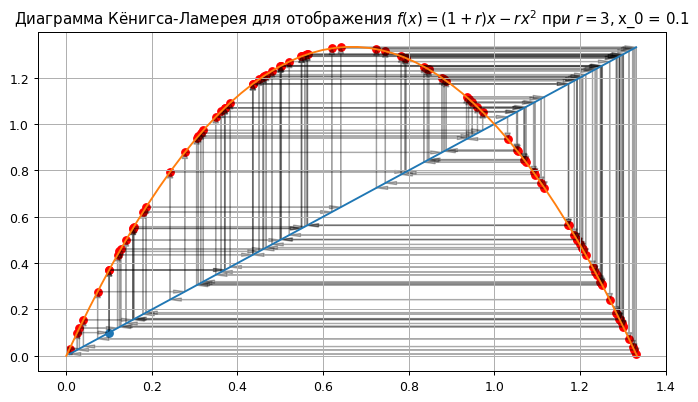

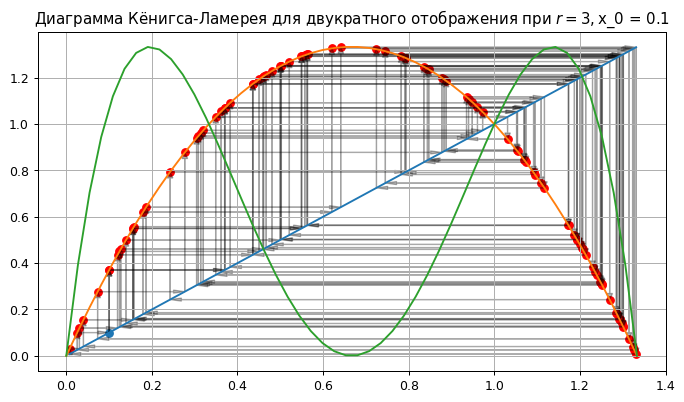

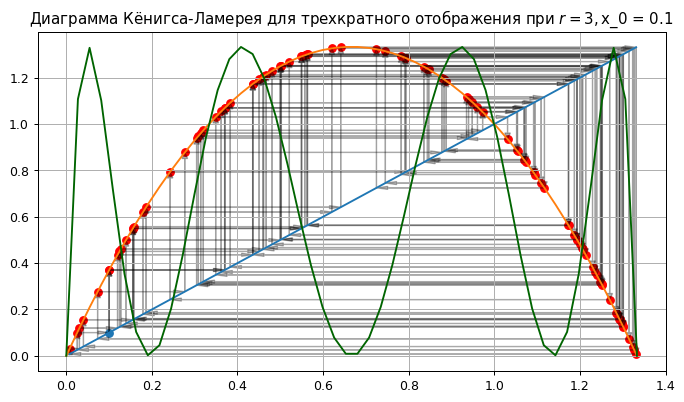

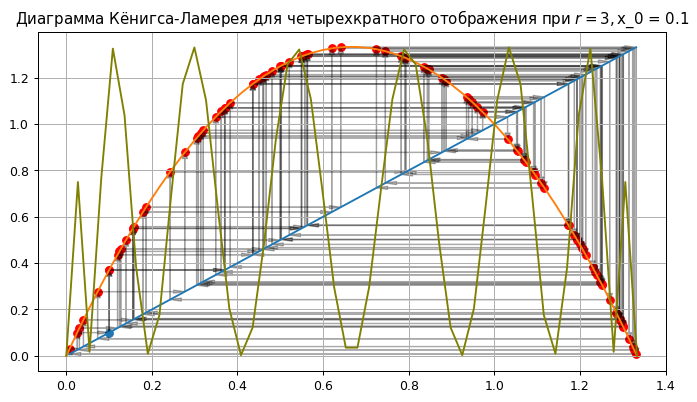

In [104]:
analyze(configs2)

В дальнейшем появляются циклы кратности $8, 16, 32, …$ и так до 
бесконечности: мы получаем бесконечный каскад бифуркаций, каждая из 
которых сопровождается удвоением периода $2^m, m=0,1,2,…$

Значения параметра $r$, при которых наблюдается каскад бифуркаций, 
образуют возрастающую последовательность: $r_1 = 3.0, r_2 = 3.449490…, r_3 = 3.544090…, r_4 = 3.564407…, r_5 = 3.568759…$, быстро сходящуюся к точке накопления $r^∞ ≈ 3,56994572..$